In [46]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')


In [3]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
train_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [6]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
train_df[['weather', 'count']].groupby(['weather'], as_index=False).mean().sort_values(by='count', ascending=False)


,weather,count
0,1,205.236791
1,2,178.955540
3,4,164.000000
2,3,118.846333


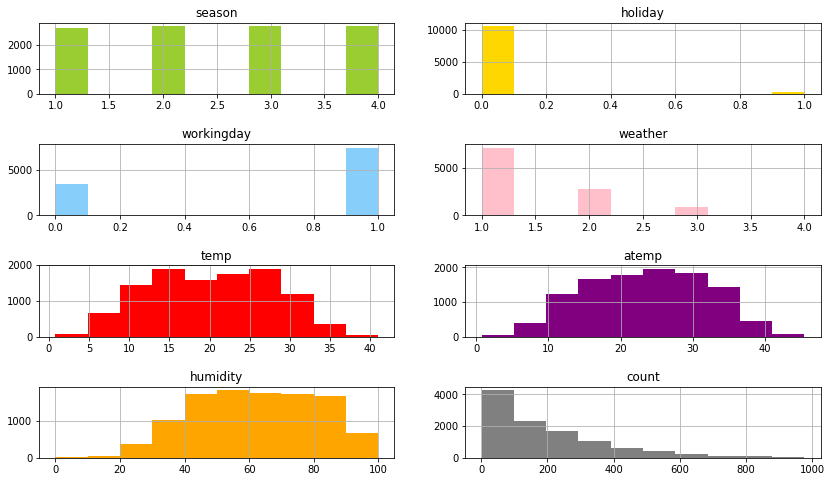

In [8]:
category = ['season','holiday','workingday','weather','temp','atemp','humidity','count']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        start = False
        
    plt.subplot2grid((4,2),(i,0))
    train_df[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    train_df[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

C:\Users\akush\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\akush\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\akush\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


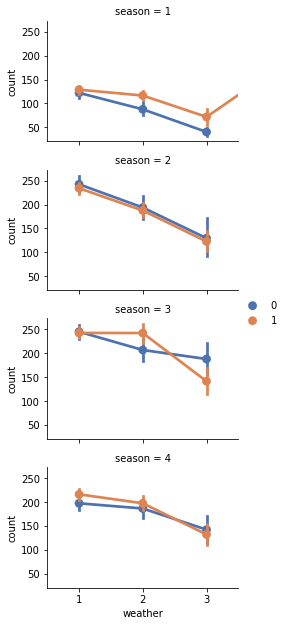

In [9]:
grid = sns.FacetGrid(train_df, row='season', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'weather', 'count', 'workingday', palette='deep')
grid.add_legend()

In [10]:
train_df.drop(["casual","registered"], inplace = True , axis = 1)

In [11]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,14


In [12]:
lis =[]
lis1=[]
lis2=[]
t=0
lis =train_df["datetime"]
for i in lis:
    lis1=i.split(' ')
    lis2.append(lis1[1])

In [13]:
lis3 =[]
lis4 =[]
for a in lis2:
    lis3=a.split(':')
    lis4.append(lis3[0])
lis4=[int(k) for k in lis4]   
lis4

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9

In [14]:
train_df.drop(["datetime"], inplace = True , axis = 1)

In [15]:
train_df['time'] =lis4

In [16]:
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time
0,1,0,0,1,9.84,14.395,81,0.0000,16,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,6
7,1,0,0,1,8.20,12.880,86,0.0000,3,7
8,1,0,0,1,9.84,14.395,75,0.0000,8,8
9,1,0,0,1,13.12,17.425,76,0.0000,14,9


In [17]:
y = train_df["count"]

In [18]:
train_df.drop(["count"], inplace = True , axis = 1)

In [28]:
x= train_df
x


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time
0,1,0,0,1,9.84,14.395,81,0.0000,0
1,1,0,0,1,9.02,13.635,80,0.0000,1
2,1,0,0,1,9.02,13.635,80,0.0000,2
3,1,0,0,1,9.84,14.395,75,0.0000,3
4,1,0,0,1,9.84,14.395,75,0.0000,4
5,1,0,0,2,9.84,12.880,75,6.0032,5
6,1,0,0,1,9.02,13.635,80,0.0000,6
7,1,0,0,1,8.20,12.880,86,0.0000,7
8,1,0,0,1,9.84,14.395,75,0.0000,8
9,1,0,0,1,13.12,17.425,76,0.0000,9


In [20]:
lis5 =[]
lis6=[]
lis7=[]
lis5 =test_df["datetime"]
for i in lis5:
    lis6=i.split(' ')
    lis7.append(lis6[1])

In [21]:
lis8 =[]
lis9 =[]
for a in lis7:
    lis8=a.split(':')
    lis9.append(lis8[0])
lis9=[int(k) for k in lis9]   
lis9

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 7,
 8,


In [22]:
test_df.drop(["datetime"], inplace = True , axis = 1)

In [30]:
test_df['time'] =lis9
x_test =test_df
x_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time
0,1,0,1,1,10.66,11.365,56,26.0027,0
1,1,0,1,1,10.66,13.635,56,0.0000,1
2,1,0,1,1,10.66,13.635,56,0.0000,2
3,1,0,1,1,10.66,12.880,56,11.0014,3
4,1,0,1,1,10.66,12.880,56,11.0014,4
5,1,0,1,1,9.84,11.365,60,15.0013,5
6,1,0,1,1,9.02,10.605,60,15.0013,6
7,1,0,1,1,9.02,10.605,55,15.0013,7
8,1,0,1,1,9.02,10.605,55,19.0012,8
9,1,0,1,2,9.84,11.365,52,15.0013,9


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_test = sc.transform(x_test)

C:\Users\akush\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\akush\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\akush\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [36]:
x_train , x1_test , y_train , y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [37]:
x_train

array([[ 0.44205341, -0.17149048, -1.46067232, ..., -0.04606385,
         0.26970368,  0.06628379],
       [ 0.44205341, -0.17149048,  0.68461625, ..., -0.51373846,
         0.5142603 ,  0.78929519],
       [-0.45390515, -0.17149048,  0.68461625, ...,  0.16179153,
         0.5142603 , -0.80132988],
       ...,
       [ 1.33801198, -0.17149048, -1.46067232, ..., -1.18926845,
         1.86178373,  0.35548835],
       [ 1.33801198, -0.17149048, -1.46067232, ...,  1.30499613,
        -0.46560752, -0.36752304],
       [ 0.44205341, -0.17149048, -1.46067232, ..., -1.65694306,
         0.75963759,  0.93389747]])

In [39]:
x1_test

array([[-1.34986372, -0.17149048,  0.68461625, ..., -0.30588308,
        -0.71016415,  1.36770431],
       [-0.45390515, -0.17149048,  0.68461625, ...,  1.40892382,
         0.75963759,  0.64469291],
       [-1.34986372, -0.17149048,  0.68461625, ..., -0.35784693,
         0.75963759,  0.64469291],
       ...,
       [ 0.44205341, -0.17149048,  0.68461625, ..., -1.65694306,
        -1.56775367,  0.93389747],
       [-1.34986372, -0.17149048,  0.68461625, ..., -0.40981077,
         2.47399596,  0.78929519],
       [ 1.33801198, -0.17149048, -1.46067232, ...,  0.68142998,
        -1.56775367, -1.66894356]])

In [40]:
y_train

3662     257
8648     865
7053      96
2685     311
5927       2
9598     391
2888      38
4296      11
5669     225
2055     218
5561     177
2301     391
4014      44
3237     366
2630     243
10765    134
7084     358
5357      20
9708     151
9537     613
4152      11
8316     201
6851     558
4299       5
3247      16
4816     190
3124      13
4428     438
3277     349
10341    367
        ... 
2496     190
7599      39
1871     150
2046       6
7877     373
4851      28
5072      87
2163      13
6036     518
6921     655
6216      95
537       72
9893     308
2897     402
7768      14
2222     168
10327    563
2599      25
705      137
3468     183
6744      42
5874      56
4373      94
7891       8
9225     792
4859     153
3264     188
9845     617
10799    132
2732     383
Name: count, Length: 8708, dtype: int64

In [41]:
y_test

6638     244
7975     239
5915     229
8050     467
5894     335
1466      40
10710    329
5138       2
1726     141
3943     391
1656     104
5168     126
1550     202
5742     149
154      187
2182     283
7921     413
9597     133
8605      68
7603       4
6239      20
8695     450
7503     136
2378      20
2263      31
1599     106
5629      49
10346    290
10046    148
8114     121
        ... 
342       84
9748     297
3580       8
1748     362
2224     180
6426      17
7796      36
7014     224
6333       3
8042     286
384       80
8650     607
6085     295
6191      22
5967      77
9031     641
3353     164
8452     374
2363     188
6796     451
3887      26
4673     300
1453      69
2206     213
3101       7
10833    340
5519       4
8217     627
5916     450
4630      75
Name: count, Length: 2178, dtype: int64

In [52]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x1_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

99.05

In [55]:

yy_pred = random_forest.predict(x_test)
yy_pred


array([ 15,   4,   5, ...,  97, 102,  77], dtype=int64)

In [56]:
submission = pd.DataFrame({
        "count": yy_pred })
submission.to_csv('./bike.csv', index=False)